In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fpt.path import DTFR
from fpt.path import get_face_image_path_from_series as get_path
from fpt.data import set_ax_locator

In [3]:
from pathlib import Path

In [4]:
_file = pd.read_csv(
    DTFR / "df_aihub_sample_file.csv", index_col="key", dtype={"folder_name": int}
)
_face = pd.read_csv(
    DTFR / "df_aihub_sample_face.csv", index_col="key", dtype={"folder_name": object}
)
face = _face.join(_file, on="key")
face.loc[:, "path"] = face.apply(lambda x: str(get_path(x)), axis=1)
face = face.sort_values(["family_id", "personal_id", "category", "option"])

In [5]:
uuid_face = face.set_index('uuid')

In [6]:
out = face.groupby(['family_id', 'personal_id', 'category']).path.apply(list).to_frame()

In [23]:
def concat_tags(uuid_series):
    _tags = uuid_series[['family_id', 'personal_id', 'option']].to_list()
    tags = [str(t) for t in _tags]
    return '-'.join(tags)

In [56]:
def draw_grid_gallery(target_imgs, cols=5):
    cols = 5
    SIZE = 80
    rows = len(target_imgs) // cols + 1
    fig, axs = plt.subplots(
        nrows=rows,
        ncols=cols,
        figsize=(4 * cols, 4 * rows),
        gridspec_kw={"wspace": 0.1},
        constrained_layout=True,
        squeeze=False,
    )
    for index, img in enumerate(target_imgs):
        r, c = index // cols, index % cols
        ax = axs[r, c]  # type: ignore
        ax.imshow(np.asarray(Image.open(img).resize((SIZE, SIZE))))
        uuid_series = uuid_face.loc[Path(img).stem]
        ax.set_xlabel(concat_tags(uuid_series))
        ax = set_ax_locator(ax, (SIZE, SIZE))

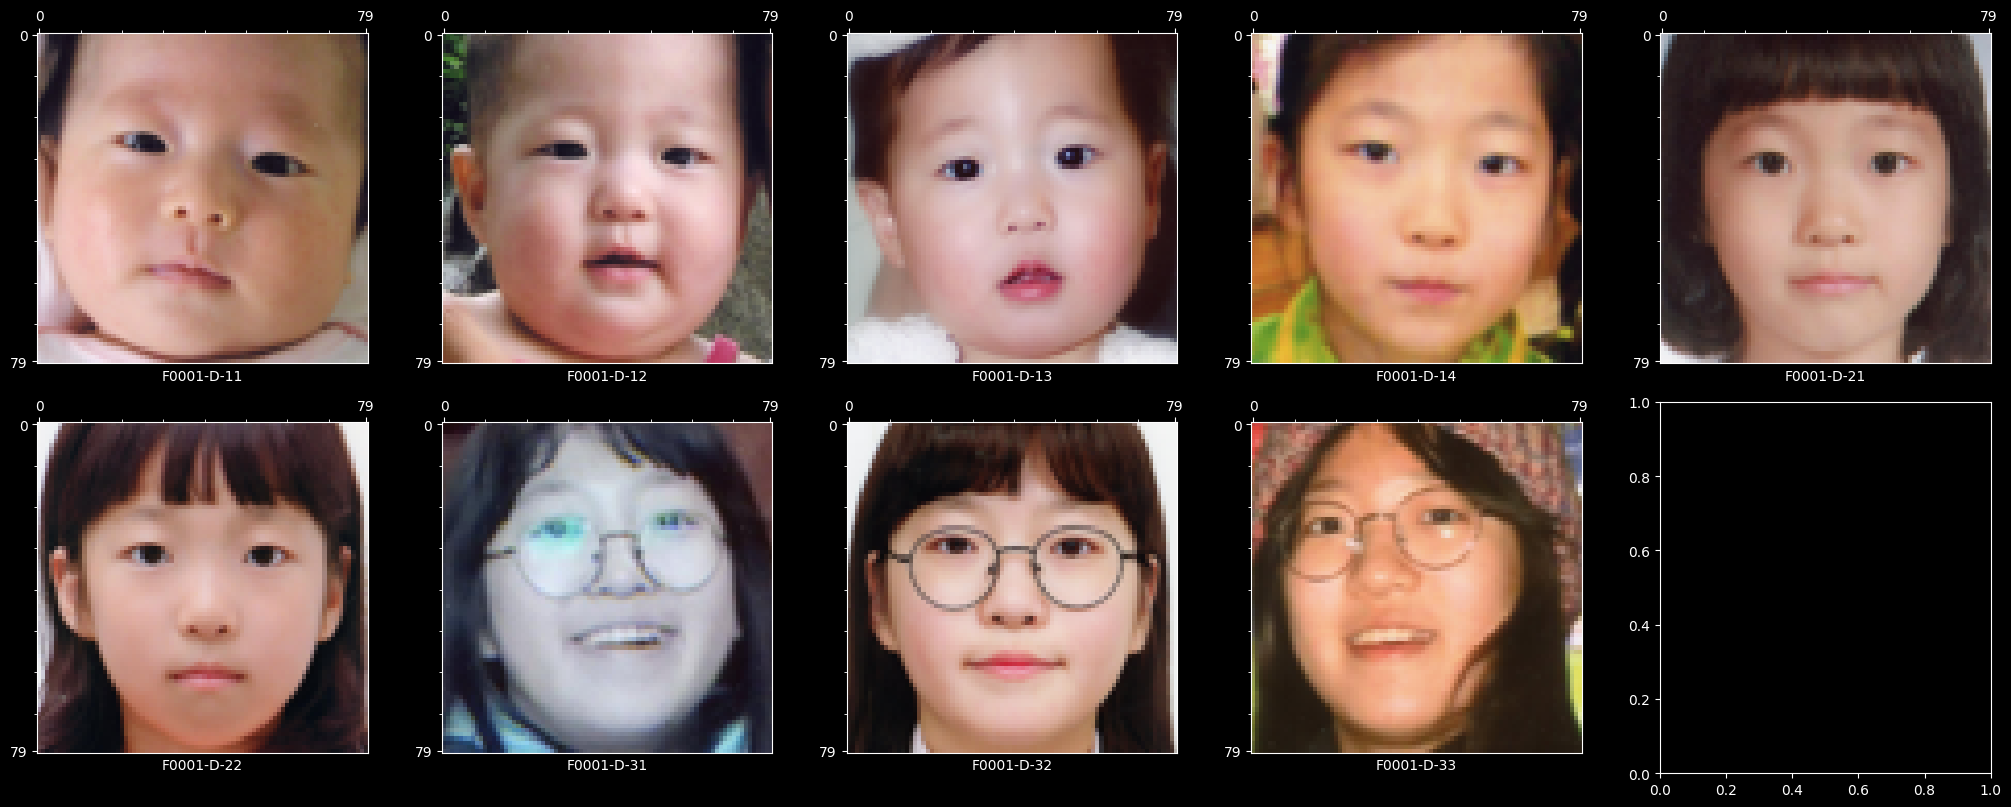

In [57]:
target_imgs = out.loc[("F0001", "D", "Age"), :]
draw_grid_gallery(target_imgs.path)

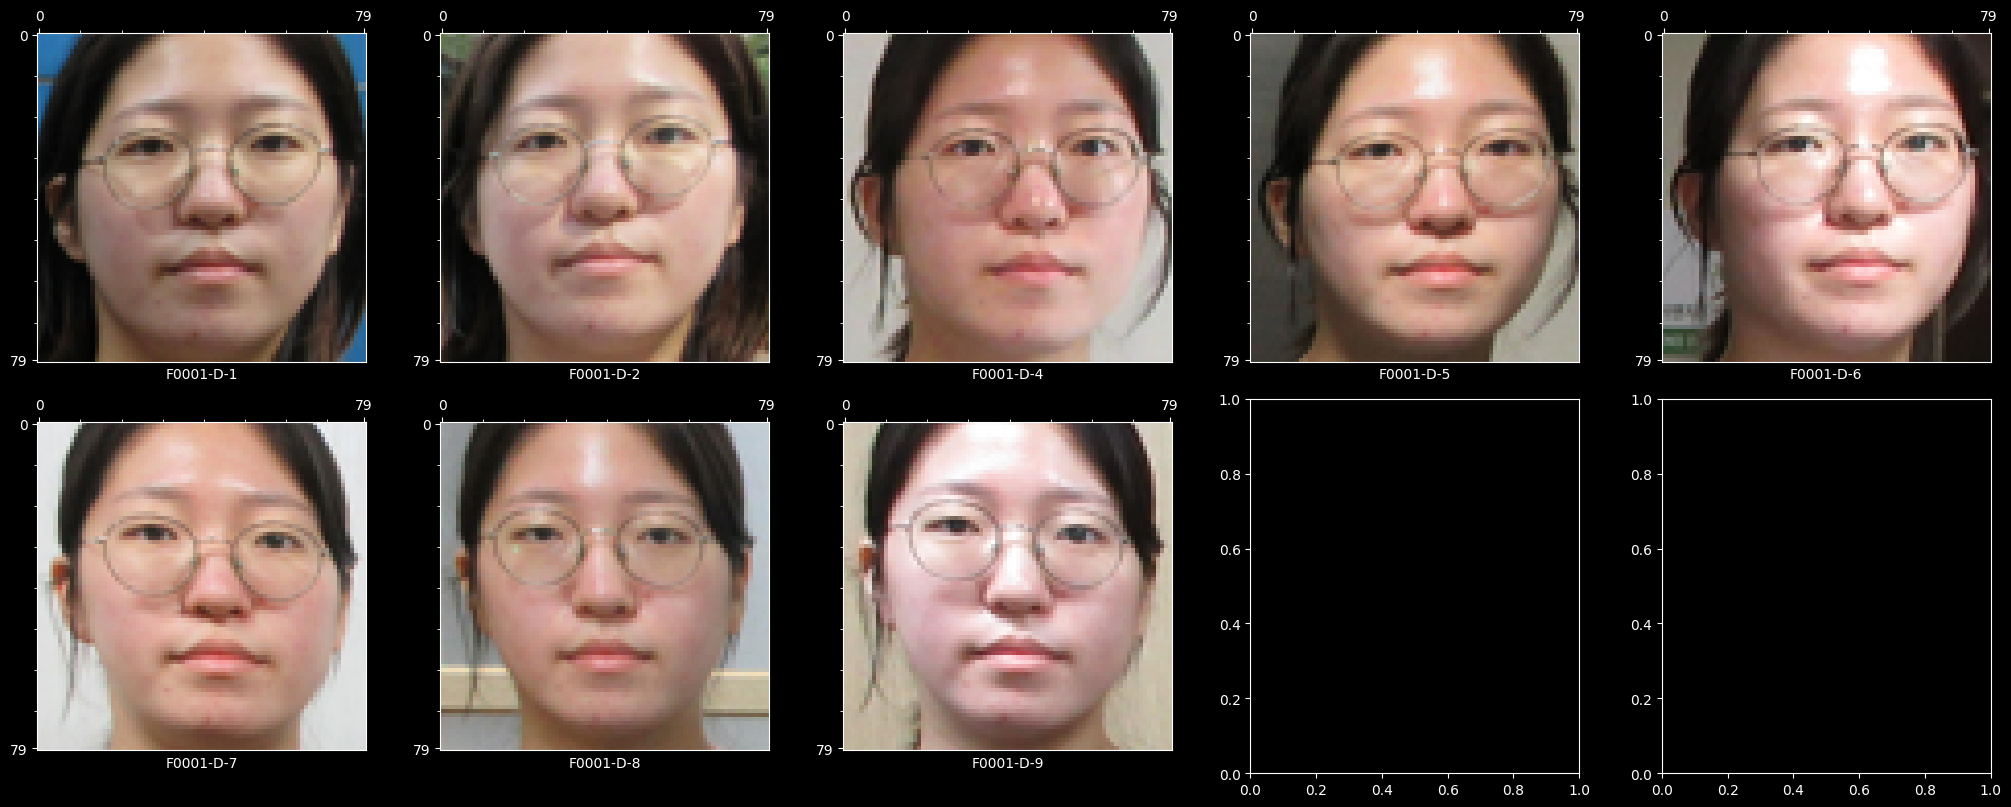

In [47]:
target_imgs = out.loc[("F0001", "D", "Family"), :]
draw_grid_gallery(target_imgs.path)

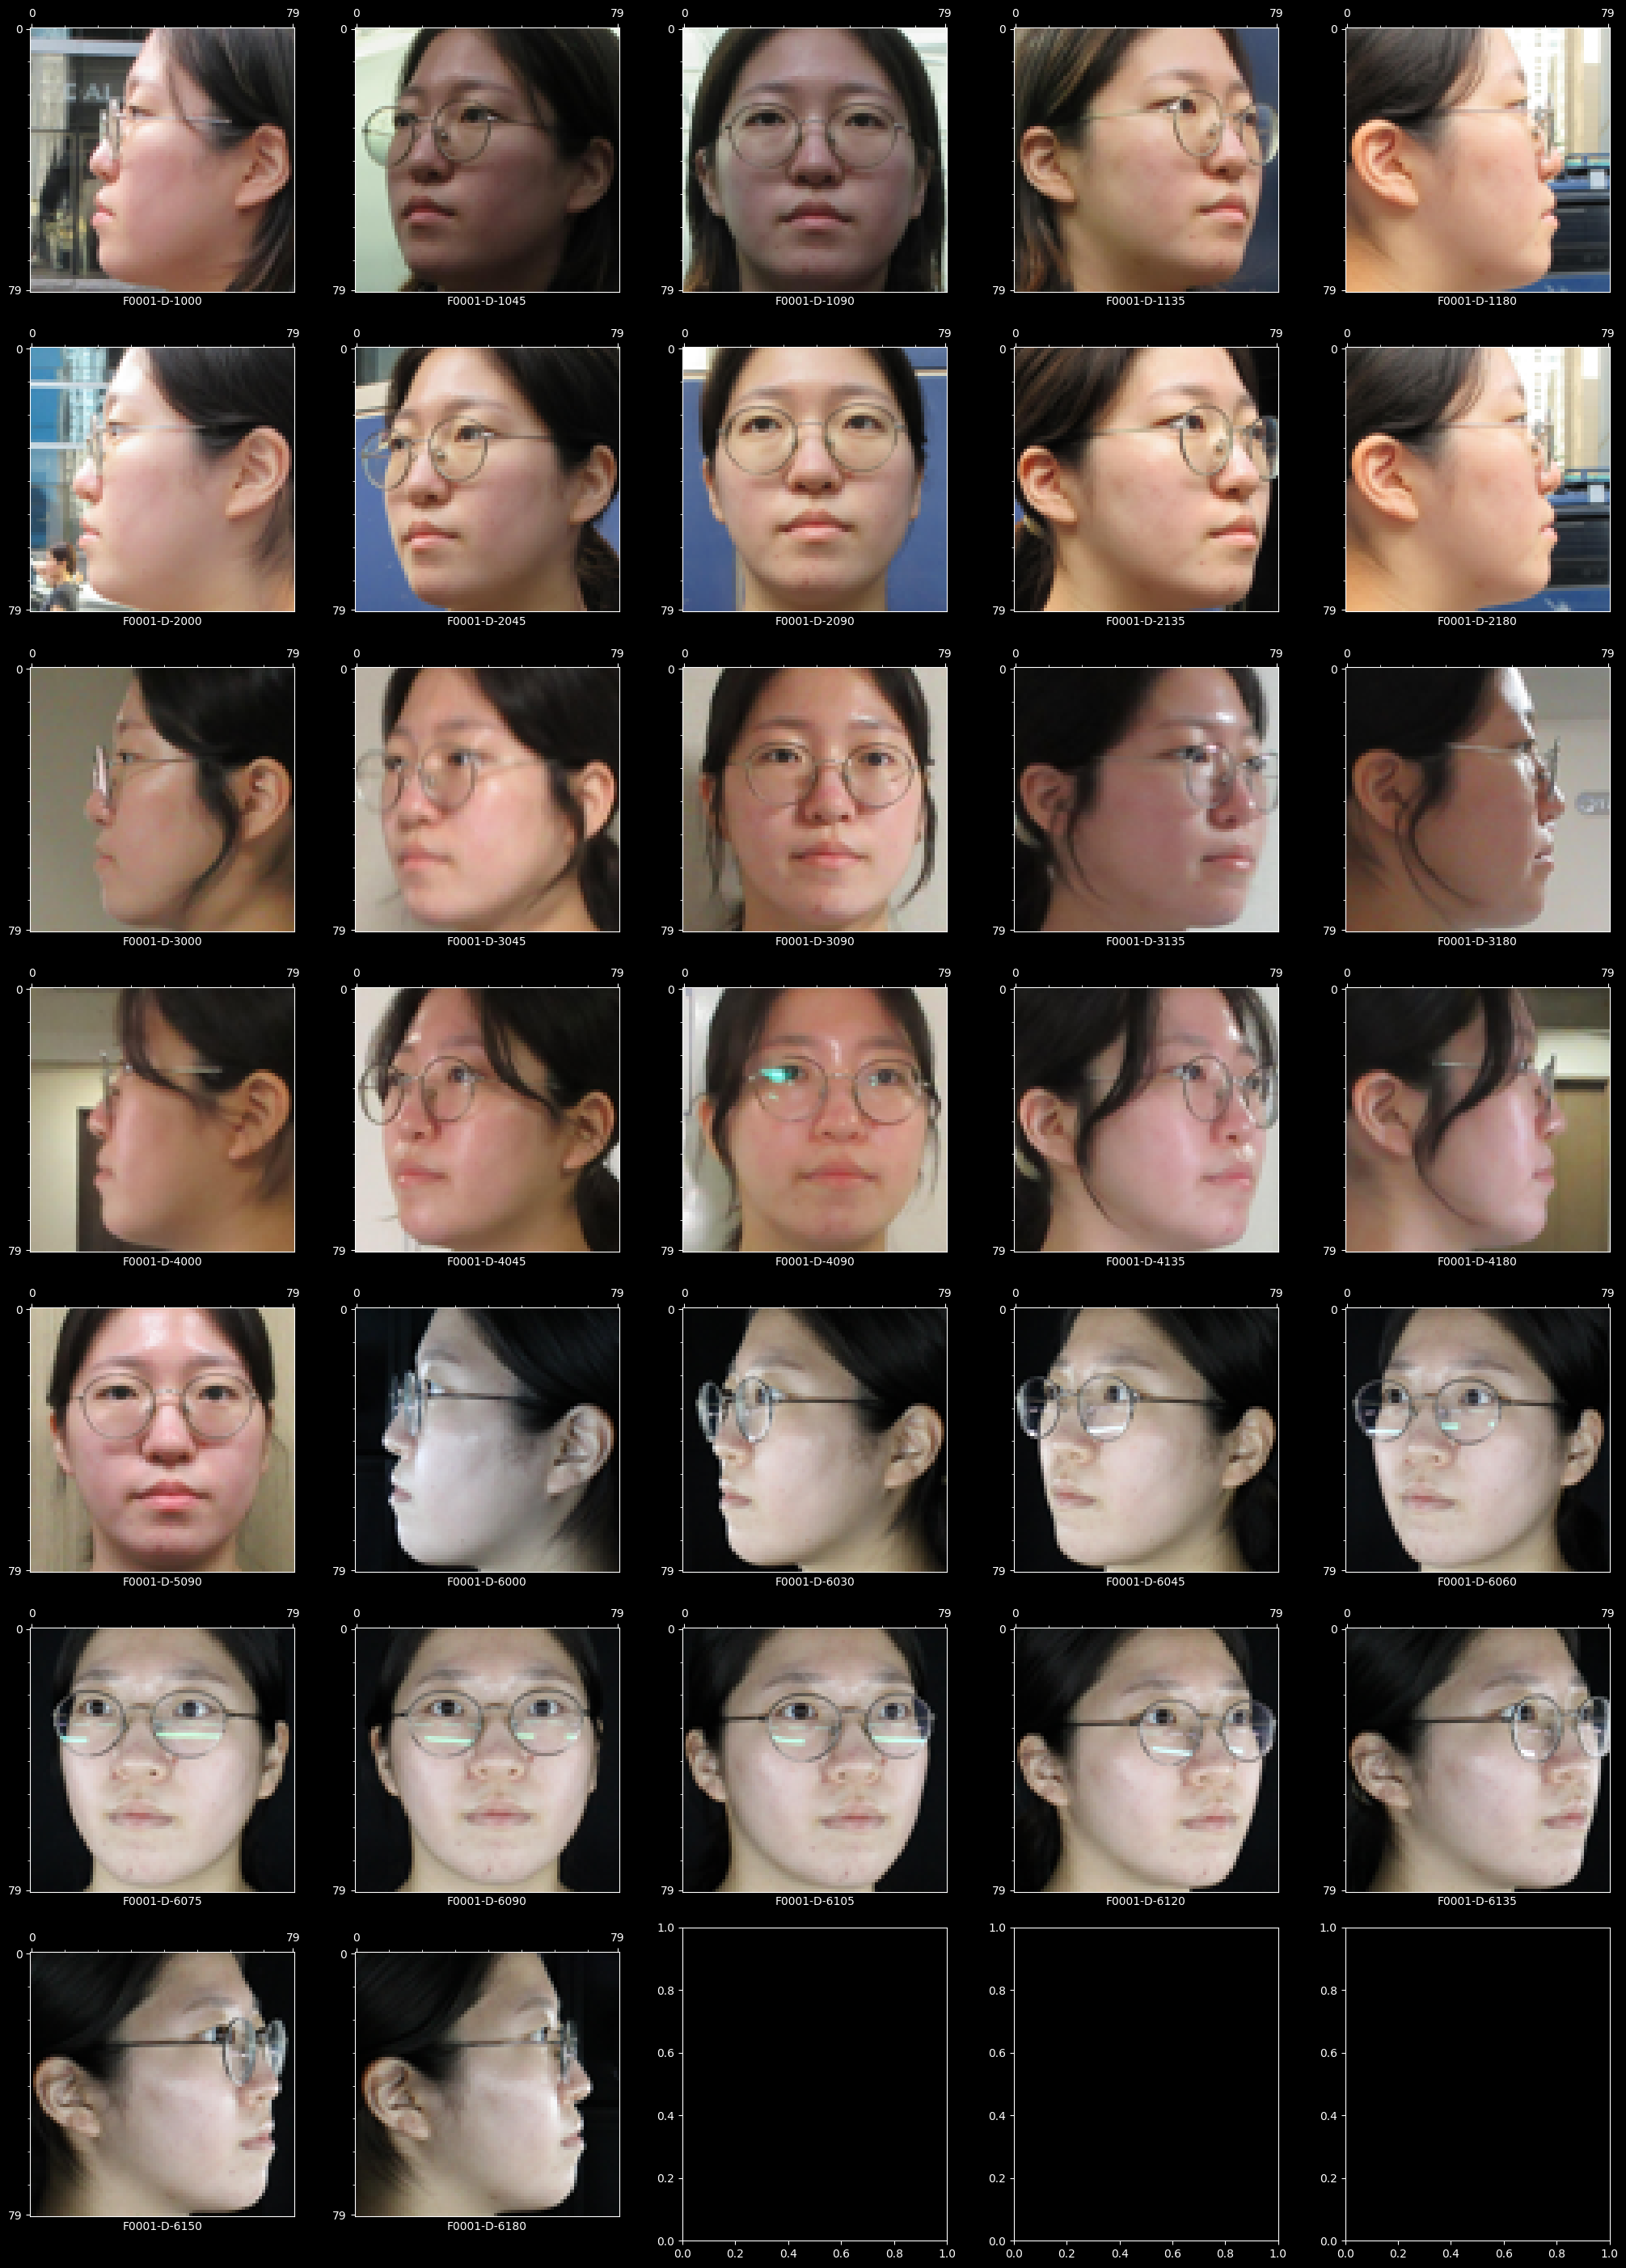

In [48]:
target_imgs = out.loc[("F0001", "D", "Individuals"), :]
draw_grid_gallery(target_imgs.path)